___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 1 (ANN) <br><br>Assignment-1 Solution<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
#pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 14)

In [9]:
df.isnull().sum().any()

False

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


<AxesSubplot:>

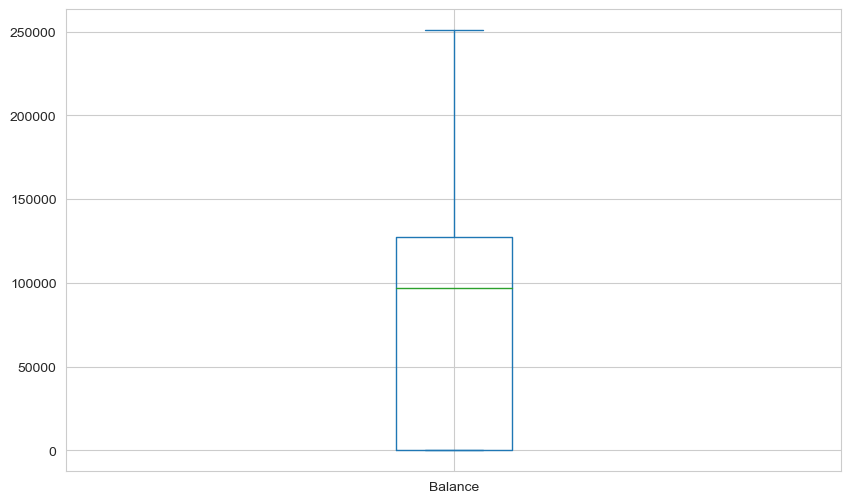

In [12]:
df.Balance.plot(kind="box")

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df.drop(["RowNumber",'CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


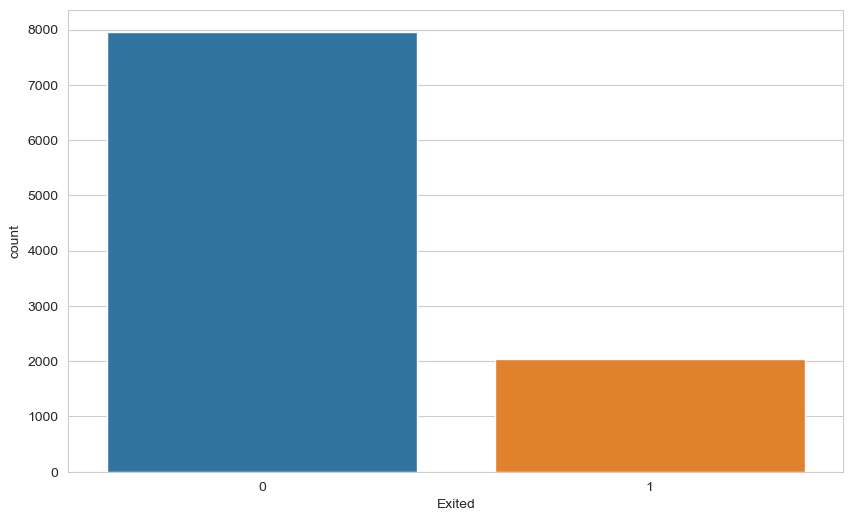

In [15]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

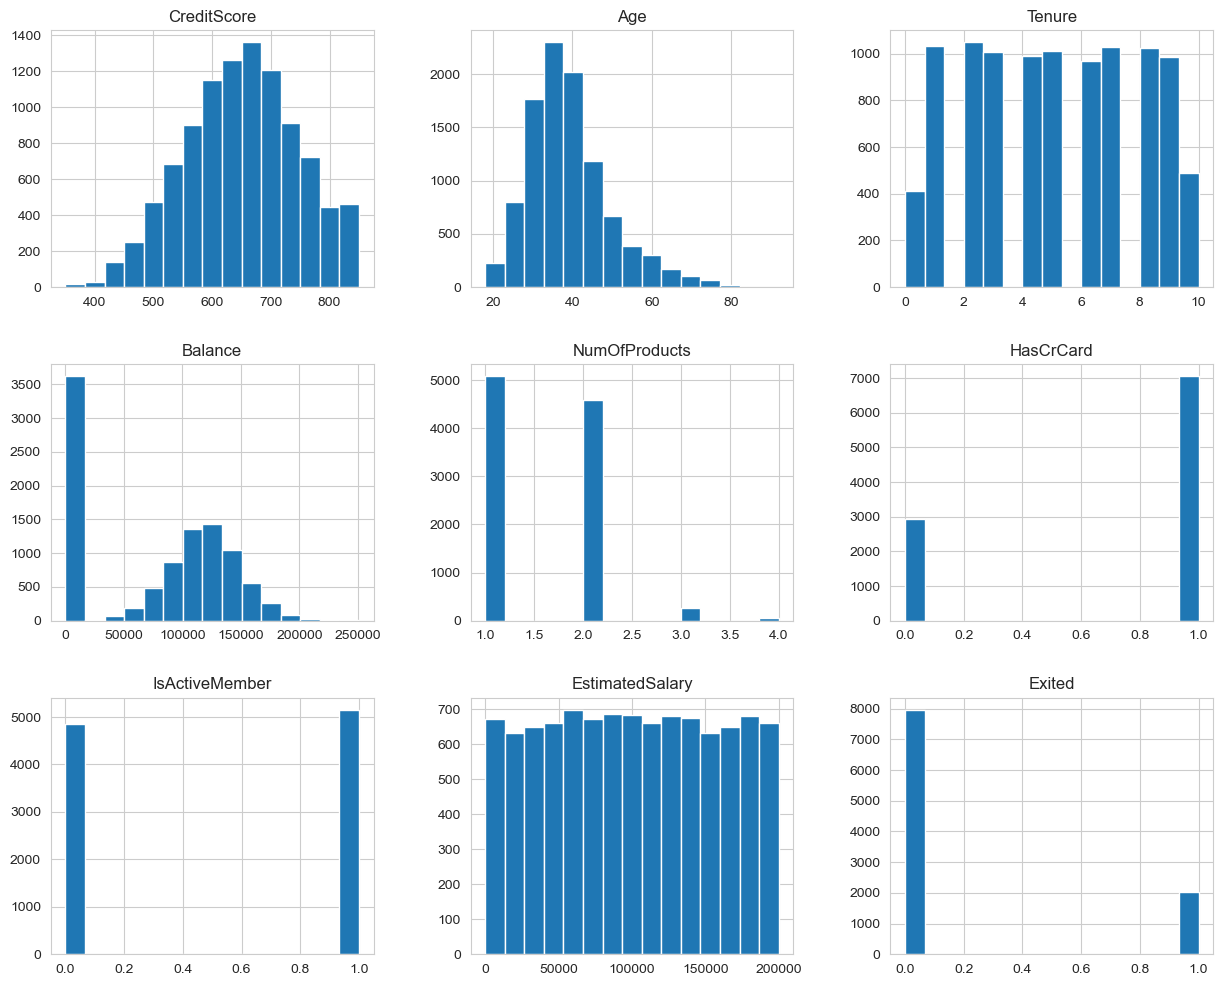

In [16]:
df.hist(figsize=(15, 12), bins=15);

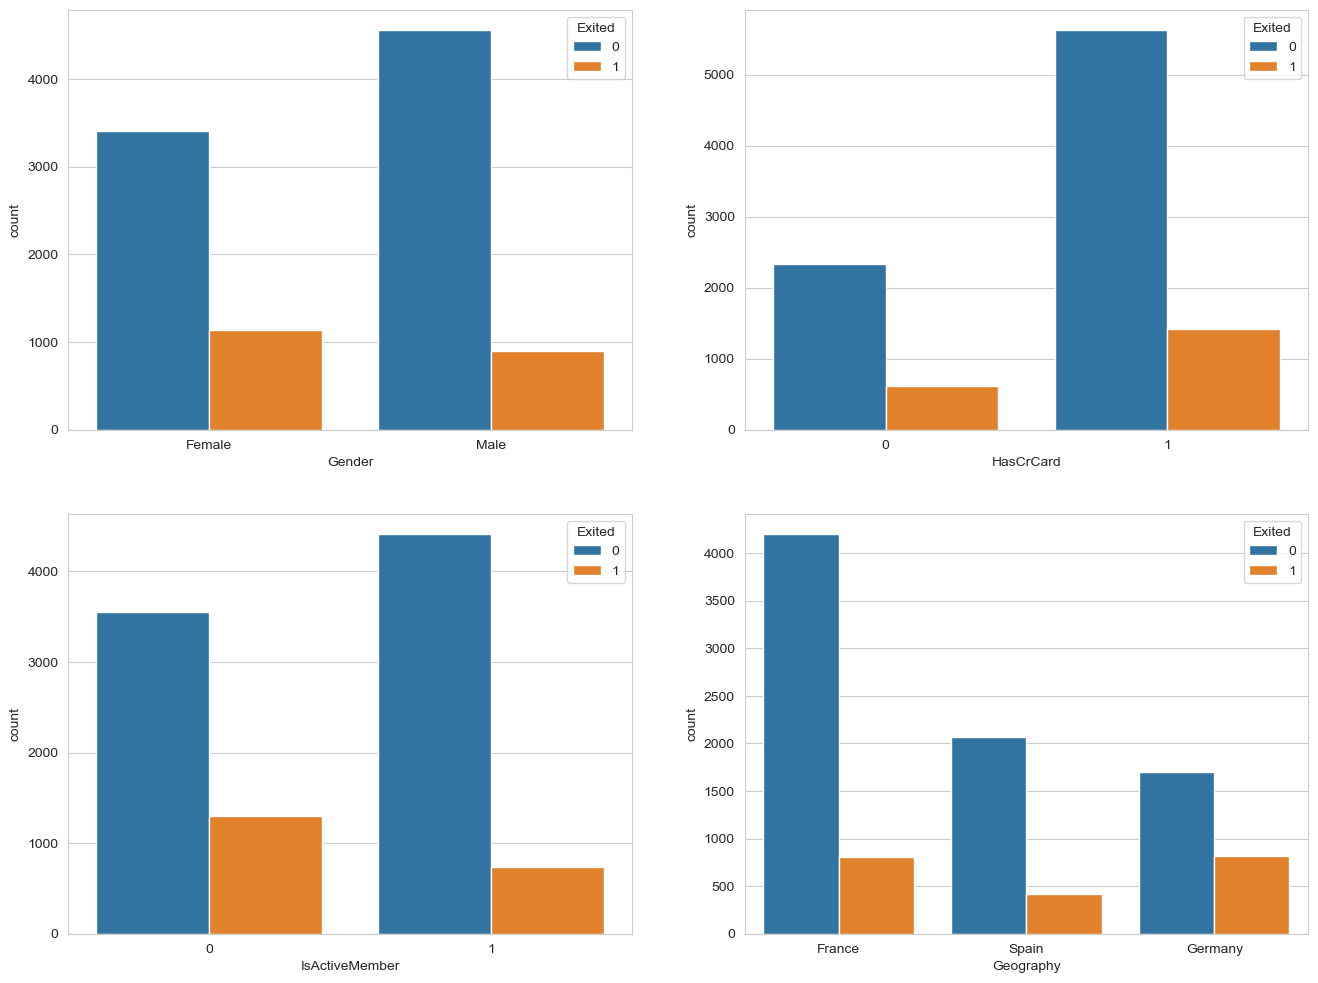

In [17]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

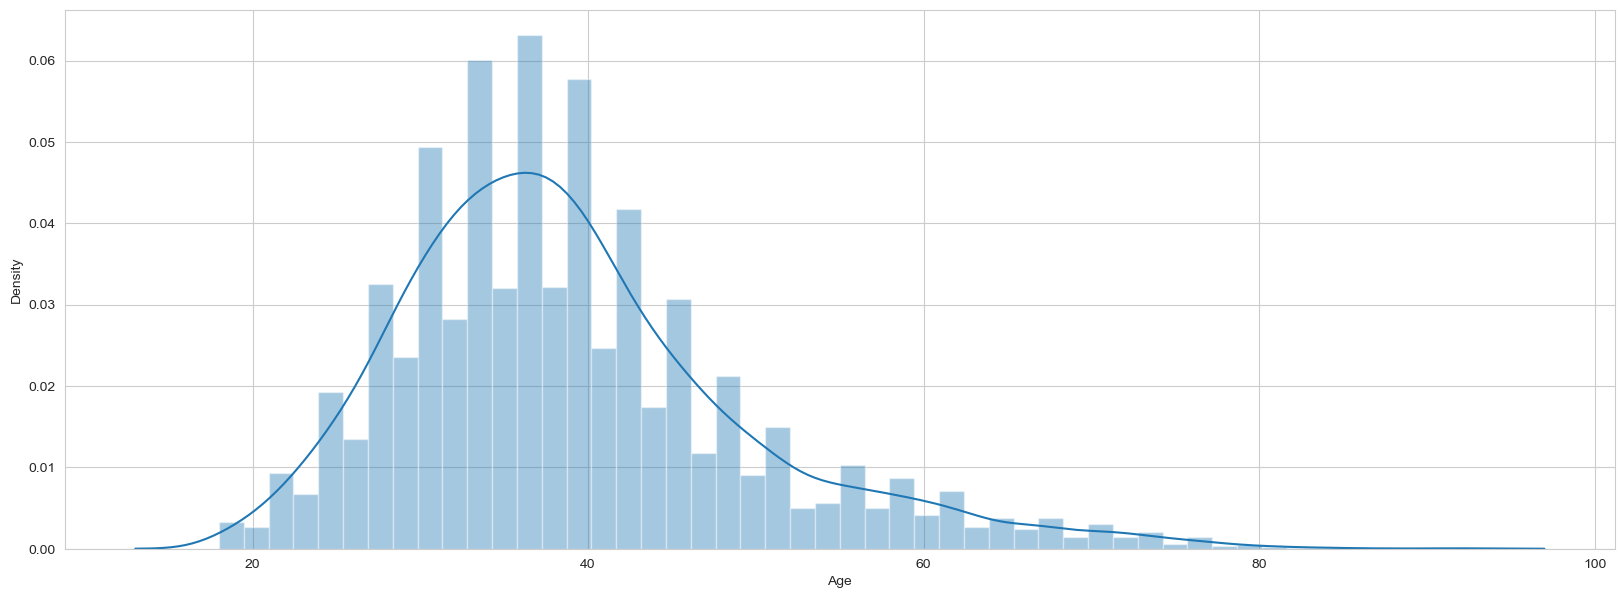

In [18]:
plt.figure(figsize=(20, 7))
sns.distplot(df.Age);

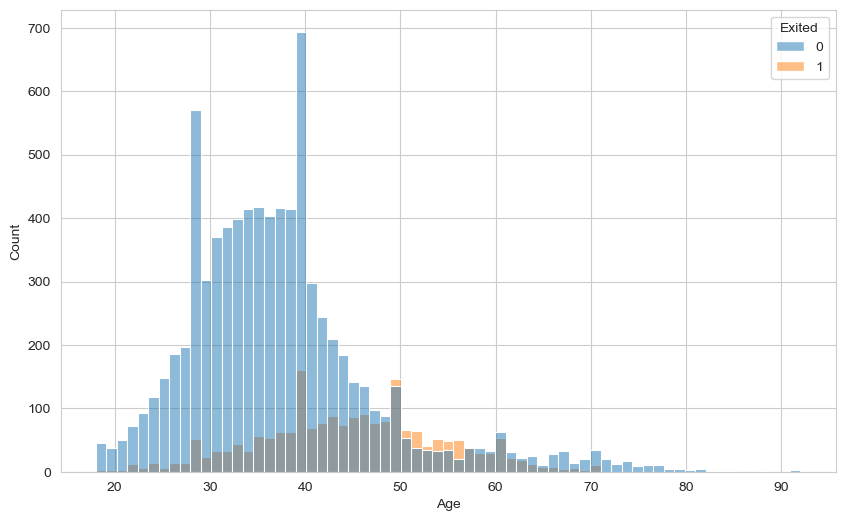

In [19]:
sns.histplot(data = df, x = "Age", hue = "Exited", fill=True);

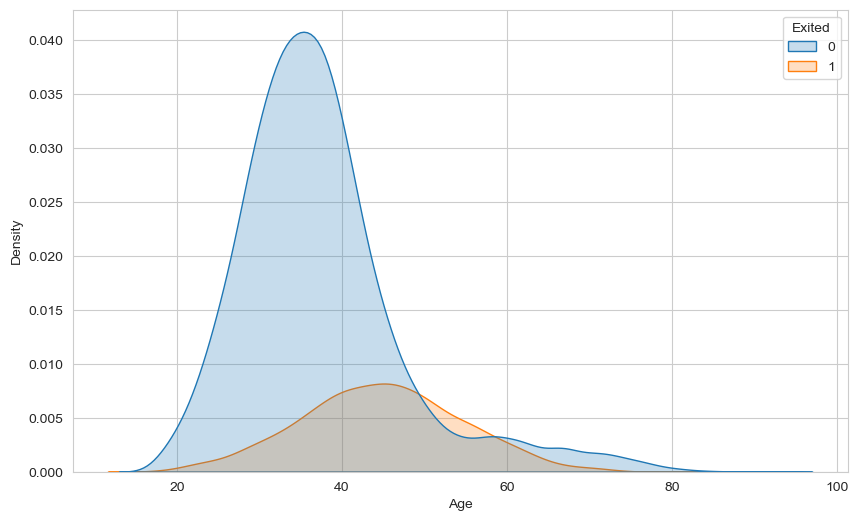

In [20]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill=True);

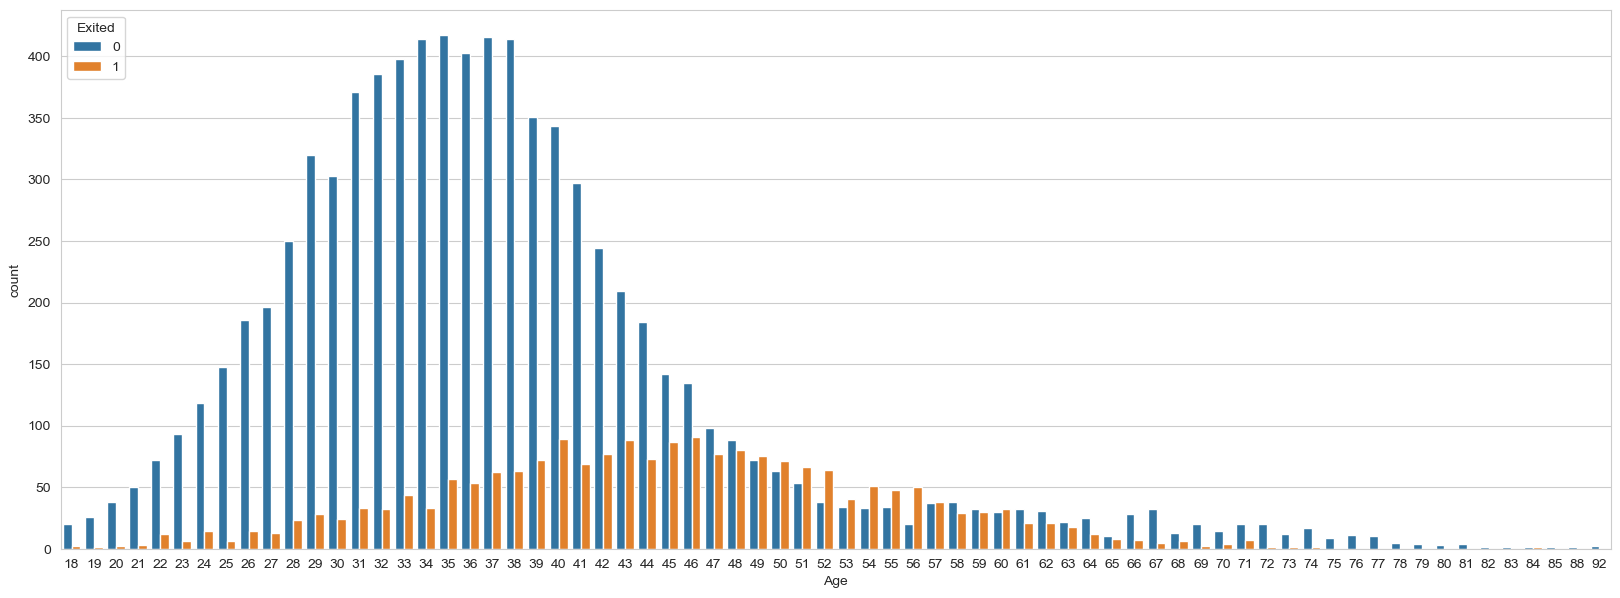

In [21]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

<AxesSubplot:>

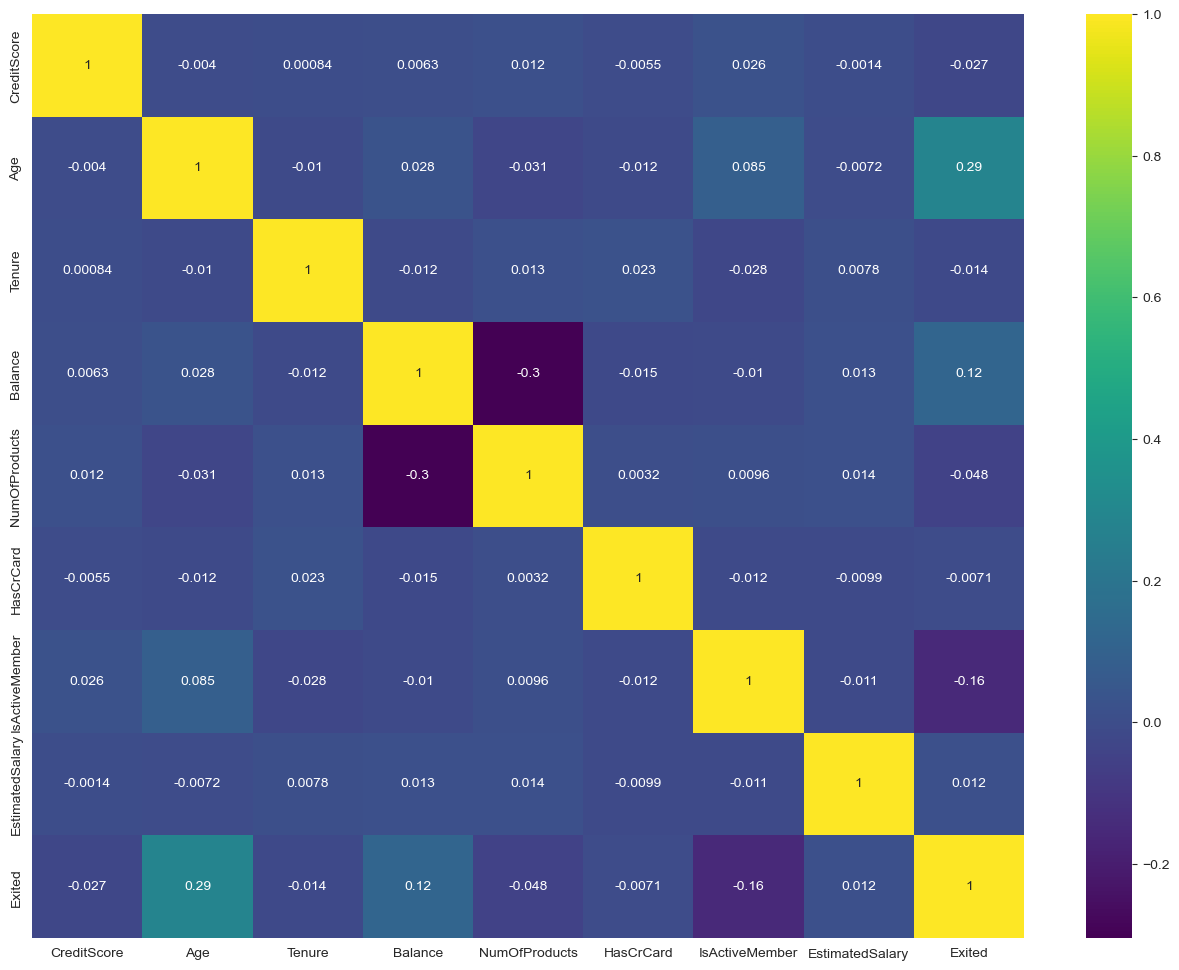

In [22]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

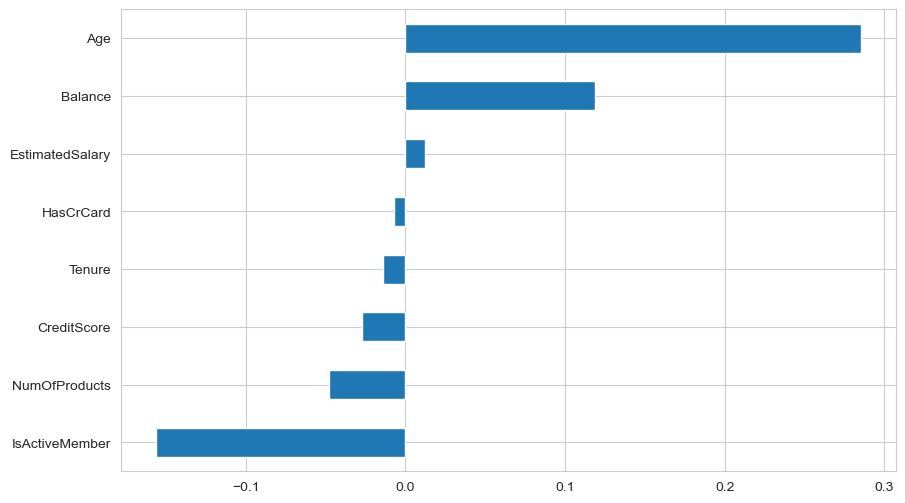

In [23]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

In [24]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
seed = 42

In [27]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

How many hidden layers should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)

How many hidden units should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)

In [30]:
X_train.shape

(9000, 11)

## without class_weigth

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [32]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1)

Epoch 1/300
64/64 [==============================] - 3s 24ms/step - loss: 0.5035 - recall: 0.0000e+00 - val_loss: 0.4716 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 1s 9ms/step - loss: 0.4774 - recall: 0.0000e+00 - val_loss: 0.4550 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 7ms/step - loss: 0.4666 - recall: 0.0000e+00 - val_loss: 0.4452 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4583 - recall: 0.0000e+00 - val_loss: 0.4375 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 6ms/step - loss: 0.4515 - recall: 0.0018 - val_loss: 0.4314 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 6ms/step - loss: 0.4448 - recall: 0.0194 - val_loss: 0.4255 - val_recall: 0.0497
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4398 - recall: 0.0975 - val_loss: 0.4169 - val_recall: 0.1768
Epoc

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

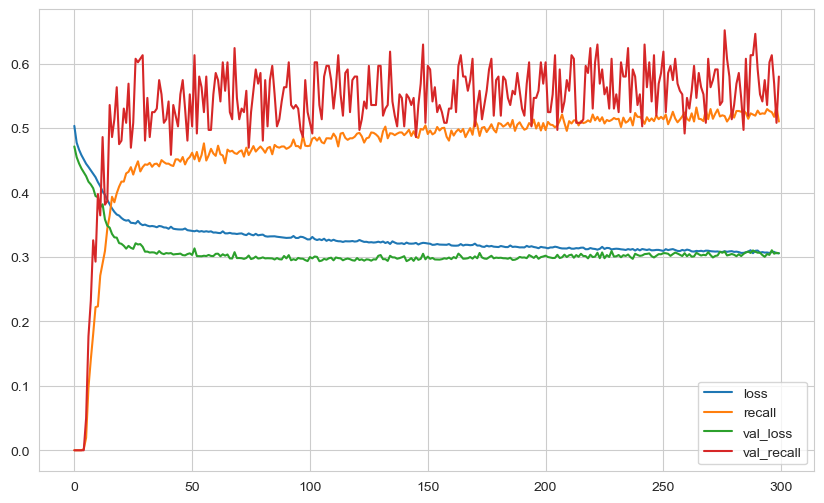

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [35]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 4ms/step
[[757  39]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.48      0.57       204

    accuracy                           0.85      1000
   macro avg       0.80      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 4ms/step


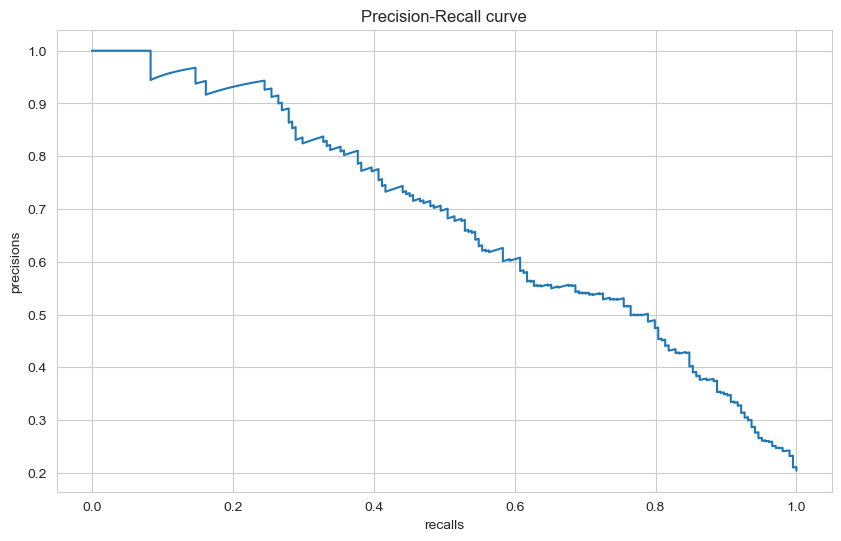

In [36]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [37]:
average_precision_score(y_test, y_pred_proba)

0.6797439043026114

## with class_weigth

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [39]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [40]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 14ms/step - loss: 0.6746 - recall: 0.5521 - val_loss: 0.6591 - val_recall: 0.6851
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6408 - recall: 0.6513 - val_loss: 0.6523 - val_recall: 0.7680
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6210 - recall: 0.6755 - val_loss: 0.6002 - val_recall: 0.7293
Epoch 4/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6028 - recall: 0.7094 - val_loss: 0.5821 - val_recall: 0.7514
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5912 - recall: 0.7167 - val_loss: 0.5540 - val_recall: 0.7238
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5796 - recall: 0.7149 - val_loss: 0.5098 - val_recall: 0.6519
Epoch 7/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5709 - recall: 0.7203 - val_loss: 0.5519 - val_recall: 0.7459
Epoch 8/300
64/64 [=====================

<AxesSubplot:>

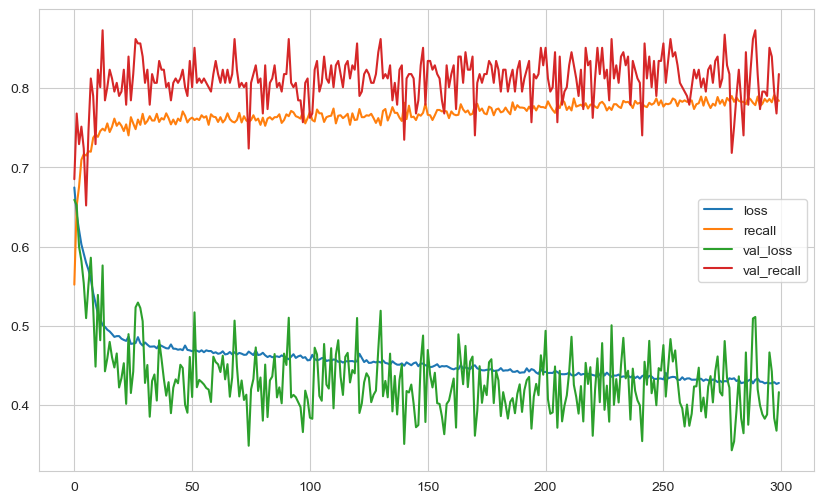

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [42]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[636 160]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       796
           1       0.49      0.75      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.80      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 3ms/step


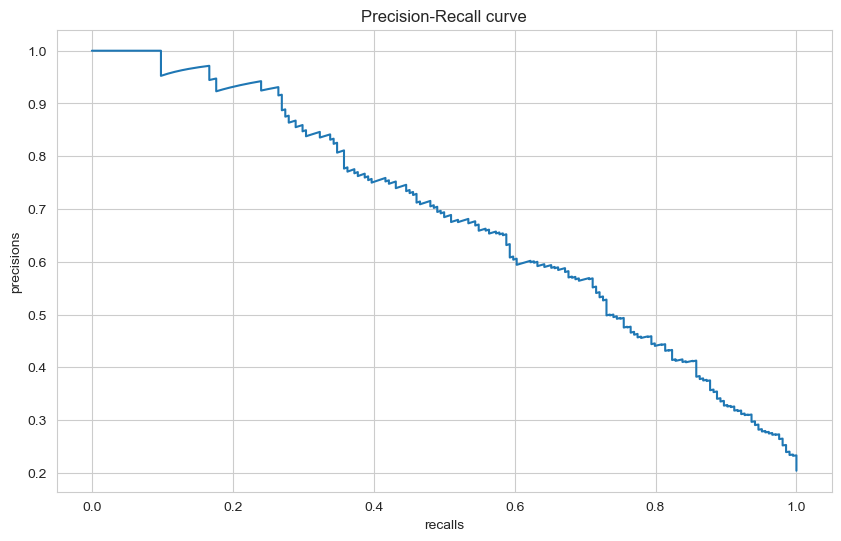

In [43]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [44]:
average_precision_score(y_test, y_pred_proba)

0.6836219848500981

### Increasing Learning Rate and Observing The Results

In [45]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# lr=0.01 => led to overfitting
# lr=0.005 => led to overfitting
# lr=0.003 => led to overfitting

In [46]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 14ms/step - loss: 0.6521 - recall: 0.6677 - val_loss: 0.6041 - val_recall: 0.7403
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5929 - recall: 0.6979 - val_loss: 0.6123 - val_recall: 0.8287
Epoch 3/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5609 - recall: 0.7137 - val_loss: 0.5218 - val_recall: 0.8177
Epoch 4/300
64/64 [==============================] - 1s 8ms/step - loss: 0.5117 - recall: 0.7427 - val_loss: 0.5163 - val_recall: 0.8674
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5018 - recall: 0.7415 - val_loss: 0.4226 - val_recall: 0.8066
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4905 - recall: 0.7379 - val_loss: 0.4123 - val_recall: 0.7845
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4853 - recall: 0.7548 - val_loss: 0.4074 - val_recall: 0.8011
Epoch 8/300
64/64 [=====================

<AxesSubplot:>

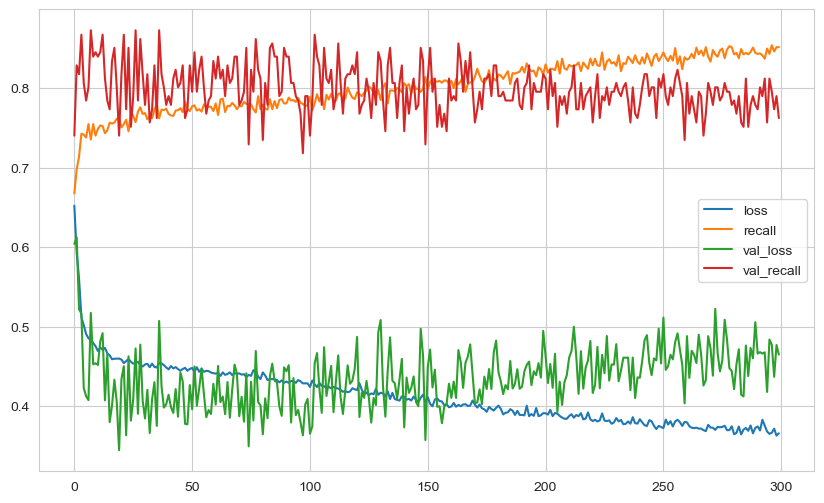

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [48]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 7ms/step
[[626 170]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



### Adding Dropout Layer

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [50]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 14ms/step - loss: 0.6862 - recall: 0.4946 - val_loss: 0.6709 - val_recall: 0.7293
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6649 - recall: 0.6180 - val_loss: 0.6361 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6443 - recall: 0.6665 - val_loss: 0.6050 - val_recall: 0.7017
Epoch 4/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6396 - recall: 0.6780 - val_loss: 0.5781 - val_recall: 0.6961
Epoch 5/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6341 - recall: 0.6701 - val_loss: 0.6251 - val_recall: 0.7790
Epoch 6/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6219 - recall: 0.6713 - val_loss: 0.5606 - val_recall: 0.7238
Epoch 7/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6186 - recall: 0.6816 - val_loss: 0.6007 - val_recall: 0.7790
Epoch 8/300
64/64 [=====================

<AxesSubplot:>

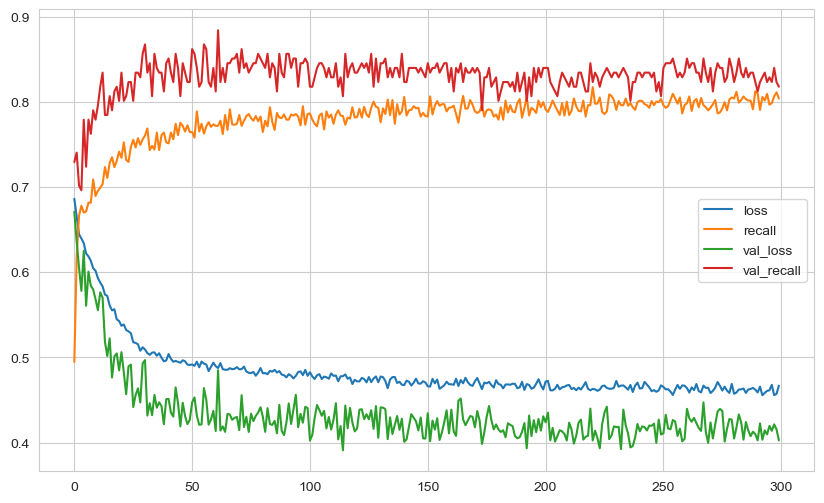

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[615 181]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.47      0.77      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.84      0.77      0.79      1000



### Adding Early Stop

#### Monitor the "val_loss" as metric

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [54]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [55]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 12ms/step - loss: 0.6787 - recall: 0.6598 - val_loss: 0.6709 - val_recall: 0.6796
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6427 - recall: 0.5720 - val_loss: 0.6321 - val_recall: 0.6961
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6126 - recall: 0.5975 - val_loss: 0.5874 - val_recall: 0.7403
Epoch 4/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5894 - recall: 0.6616 - val_loss: 0.5370 - val_recall: 0.7403
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5743 - recall: 0.6768 - val_loss: 0.4875 - val_recall: 0.7514
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5509 - recall: 0.7107 - val_loss: 0.4393 - val_recall: 0.7127
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5410 - recall: 0.7203 - val_loss: 0.4903 - val_recall: 0.8287
Epoch 8/300
64/64 [=====================

<AxesSubplot:>

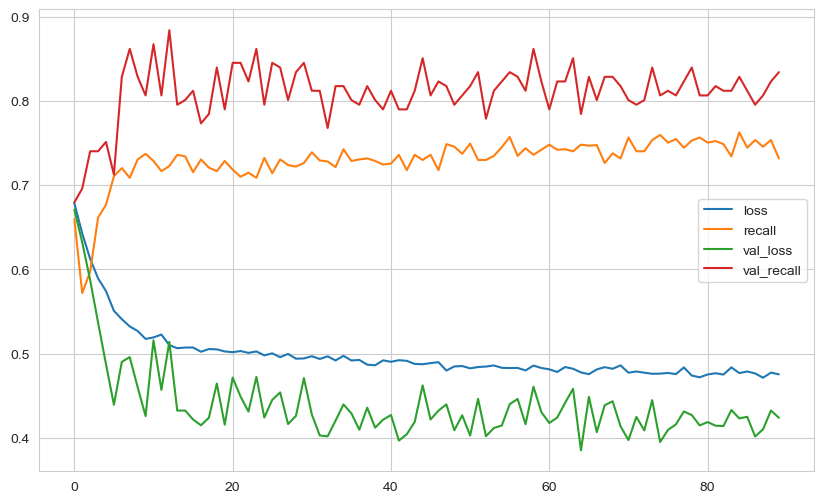

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [57]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[661 135]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       796
           1       0.52      0.73      0.61       204

    accuracy                           0.81      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.81      0.82      1000



#### Monitor the "val_recall" as metric

In [58]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [59]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [60]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 16ms/step - loss: 0.6639 - recall: 0.6459 - val_loss: 0.5827 - val_recall: 0.6961
Epoch 2/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6329 - recall: 0.6568 - val_loss: 0.6234 - val_recall: 0.7514
Epoch 3/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6113 - recall: 0.6550 - val_loss: 0.5637 - val_recall: 0.7017
Epoch 4/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5929 - recall: 0.6568 - val_loss: 0.5324 - val_recall: 0.7017
Epoch 5/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5684 - recall: 0.6973 - val_loss: 0.4669 - val_recall: 0.7127
Epoch 6/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5452 - recall: 0.6877 - val_loss: 0.4498 - val_recall: 0.8066
Epoch 7/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5285 - recall: 0.7209 - val_loss: 0.5071 - val_recall: 0.8398
Epoch 8/300
64/64 [=====================

<AxesSubplot:>

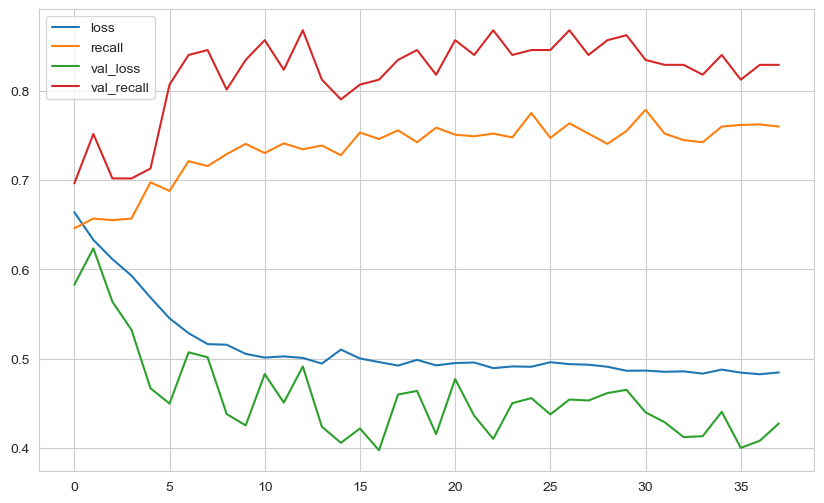

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[548 248]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.79       796
           1       0.40      0.82      0.54       204

    accuracy                           0.72      1000
   macro avg       0.67      0.76      0.67      1000
weighted avg       0.83      0.72      0.74      1000



## GridSearchCV

In [63]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [64]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [65]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [66]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)

In [67]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn=build_classifier, validation_split = 0.1, epochs=200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 4s 33ms/step - loss: 0.6827 - recall: 0.5248 - val_loss: 0.6015 - val_recall: 0.5249
Epoch 2/200
32/32 [==============================] - 0s 10ms/step - loss: 0.6411 - recall: 0.6489 - val_loss: 0.5604 - val_recall: 0.7127
Epoch 3/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6148 - recall: 0.6501 - val_loss: 0.5534 - val_recall: 0.6685
Epoch 4/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5954 - recall: 0.6653 - val_loss: 0.5330 - val_recall: 0.7293
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 0.5638 - recall: 0.7107 - val_loss: 0.4903 - val_recall: 0.7569
Epoch 6/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5491 - recall: 0.7185 - val_loss: 0.4625 - val_recall: 0.7735
Epoch 7/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5378 - recall: 0.7246 - val_loss: 0.42

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000246C796BDC0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [68]:
grid_model.best_score_

0.8504763094203904

In [69]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [70]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[519 277]
 [ 30 174]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       796
           1       0.39      0.85      0.53       204

    accuracy                           0.69      1000
   macro avg       0.67      0.75      0.65      1000
weighted avg       0.83      0.69      0.72      1000



### Precision-Recall Curve and AP (Average Precision) for grid_model

32/32 [==============================] - 0s 3ms/step


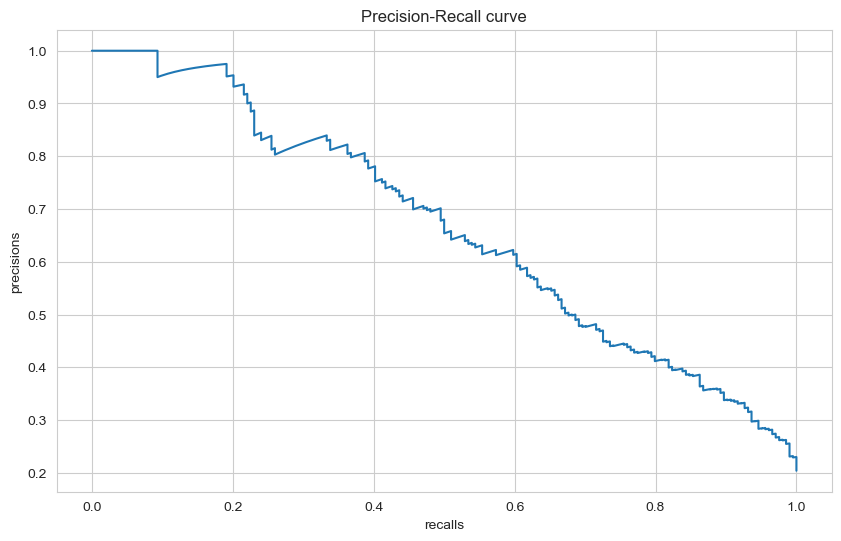

In [71]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [72]:
average_precision_score(y_test, y_pred_proba)

0.6648338027246894

## Final Model and Model Deployment

In [73]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [74]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(lr=0.005)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 4s 16ms/step - loss: 0.6355 - recall: 0.6356 - val_loss: 0.6101 - val_recall: 0.6225
Epoch 2/200
71/71 [==============================] - 0s 6ms/step - loss: 0.5993 - recall: 0.6748 - val_loss: 0.5643 - val_recall: 0.6275
Epoch 3/200
71/71 [==============================] - 1s 7ms/step - loss: 0.5729 - recall: 0.6907 - val_loss: 0.5752 - val_recall: 0.7108
Epoch 4/200
71/71 [==============================] - 0s 6ms/step - loss: 0.5509 - recall: 0.7016 - val_loss: 0.5681 - val_recall: 0.7451
Epoch 5/200
71/71 [==============================] - 0s 6ms/step - loss: 0.5321 - recall: 0.7103 - val_loss: 0.4897 - val_recall: 0.6618
Epoch 6/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5171 - recall: 0.7141 - val_loss: 0.5359 - val_recall: 0.7549
Epoch 7/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5009 - recall: 0.7223 - val_loss: 0.4361 - val_recall: 0.6127
Epoch 8/200
71/71 [=====================

<AxesSubplot:>

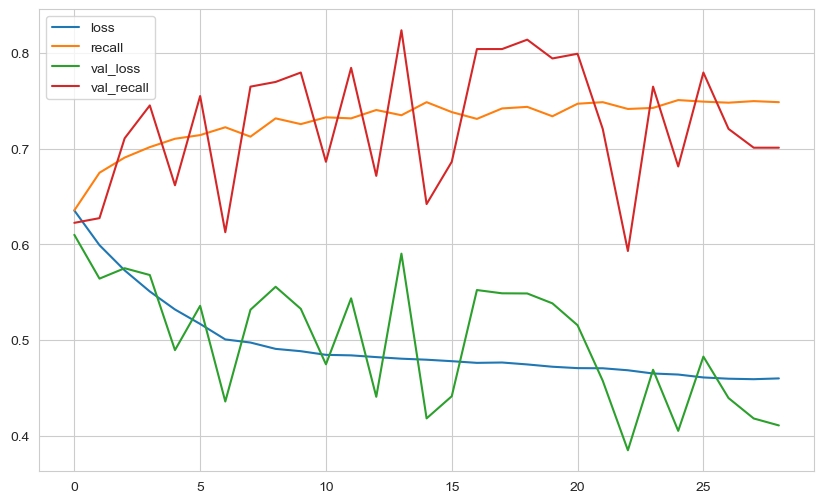

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[527 269]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.78       796
           1       0.38      0.82      0.52       204

    accuracy                           0.69      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.69      0.72      1000



In [77]:
model.save('model_churn.h5')

### Prediction

In [78]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [79]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [80]:
model.predict(single_customer)

1/1 [==============================] - 0s 72ms/step


array([[0.56764996]], dtype=float32)

In [81]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [83]:
clf1 = RandomForestClassifier(random_state=seed, class_weight="balanced")
clf2 = SVC(probability=True, random_state=seed, class_weight="balanced")
clf3 = LogisticRegression(random_state=seed, class_weight="balanced")

In [84]:
[10**(-2+i) for i in range(5)]

[0.01, 0.1, 1, 10, 100]

In [85]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2+i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2+i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [86]:
display(param1, param2, param3)

{'classifier__n_estimators': [10, 50, 100, 250],
 'classifier__max_depth': [5, 10, 20],
 'classifier': [RandomForestClassifier(class_weight='balanced', random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier': [SVC(class_weight='balanced', probability=True, random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__penalty': ['l1', 'l2'],
 'classifier': [LogisticRegression(class_weight='balanced', random_state=42)]}

In [87]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [88]:
pipeline

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [89]:
grid_model = GridSearchCV(pipeline, params, cv=5, n_jobs=-1,
                  scoring='recall').fit(X_train, y_train)

In [90]:
grid_model.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                        random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [91]:
grid_model.best_score_

0.7250442965411474

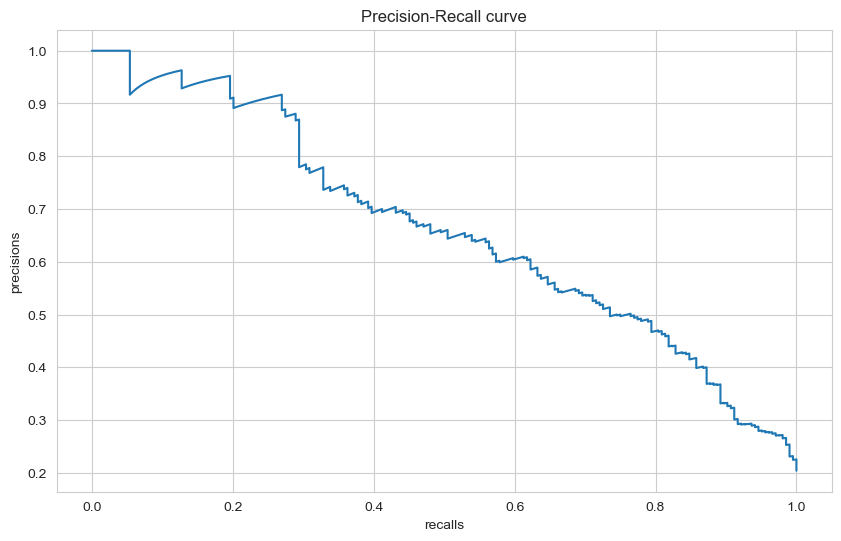

In [92]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [93]:
average_precision_score(y_test, y_pred_proba)

0.6635759012236955

In [94]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[644 152]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.74      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.80      0.81      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___